In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('dataset.csv')

In [4]:
# Aggregate the data to get total deaths by year
aggregated_data = data.groupby('tahun')['jumlah'].sum().reset_index()

# Set the 'tahun' column as the index
aggregated_data.set_index('tahun', inplace=True)


In [5]:
# Train-test split
train_data = aggregated_data.iloc[:-3]
test_data = aggregated_data.iloc[-3:]

# Build the SARIMA model
sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = sarima_model.fit()
# Forecast using SARIMA
sarima_forecast = sarima_results.forecast(steps=len(test_data))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting paramete

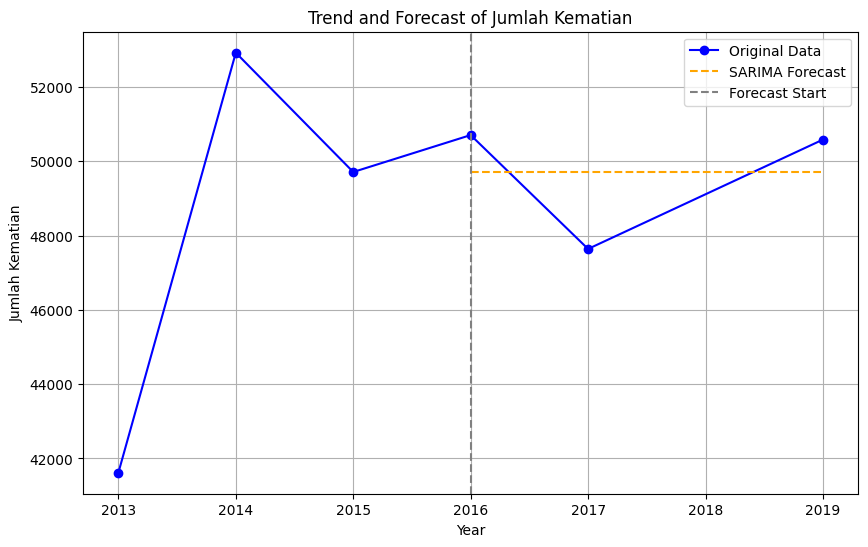

In [6]:
# Plot the overall trend and SARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(aggregated_data, label='Original Data', marker='o', color='blue')
plt.plot(test_data.index, sarima_forecast, label='SARIMA Forecast', linestyle='--', color='orange')
plt.axvline(x=test_data.index[0], color='gray', linestyle='--', label='Forecast Start')
plt.title('Trend and Forecast of Jumlah Kematian')
plt.xlabel('Year')
plt.ylabel('Jumlah Kematian')
plt.legend()
plt.grid()
plt.show()

In [7]:
# Display forecast results in a DataFrame
sarima_forecast_df = pd.DataFrame({
    'Year': test_data.index,
    'Actual': test_data['jumlah'].values,
    'SARIMA Forecast': sarima_forecast.values
}).set_index('Year')

print(sarima_forecast_df)

       Actual  SARIMA Forecast
Year                          
2016  50704.0          49710.0
2017  47639.0          49710.0
2019  50582.0          49710.0


CODE  UNTUK PREDIKSI

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting paramete

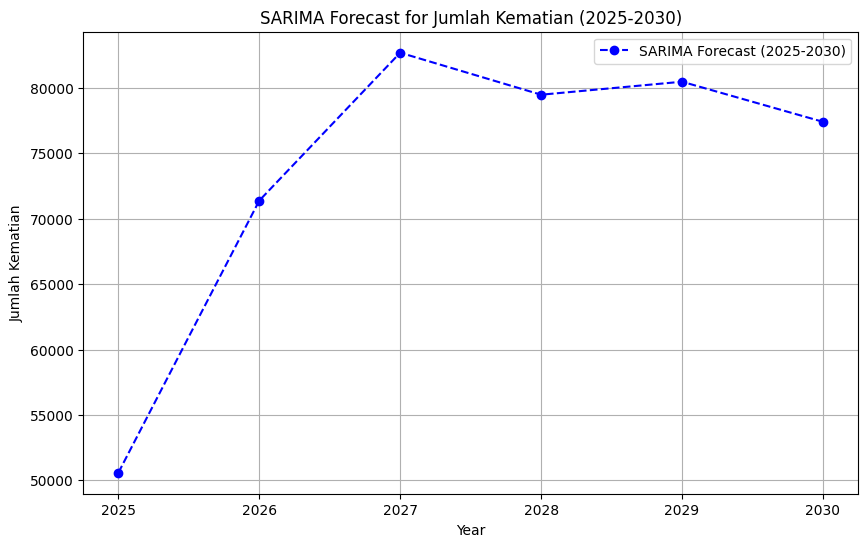

Predicted Values from 2025 to 2030:
2025    50582
2026    71390
2027    82696
2028    79485
2029    80479
2030    77414
Name: predicted_mean, dtype: int64


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('dataset.csv')

# Aggregate the data to get total deaths by year
aggregated_data = data.groupby('tahun')['jumlah'].sum().reset_index()

# Set the 'tahun' column as the index
aggregated_data.set_index('tahun', inplace=True)

# Train the SARIMA model
sarima_model = SARIMAX(aggregated_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = sarima_model.fit()

# Extend forecast to include predictions up to 2030
future_years_extended = np.arange(aggregated_data.index[-1] + 1, 2031)  # Predict until 2030
sarima_forecast_extended = sarima_results.forecast(steps=len(future_years_extended))

# Assign the correct index (future years) to the forecast
sarima_forecast_extended.index = future_years_extended

# Filter results for 2025 to 2030 only
sarima_forecast_filtered = sarima_forecast_extended.loc[2025:2030]

# Plot the forecast for 2025 to 2030
plt.figure(figsize=(10, 6))
plt.plot(sarima_forecast_filtered, label='SARIMA Forecast (2025-2030)', linestyle='--', color='blue', marker='o')
plt.title('SARIMA Forecast for Jumlah Kematian (2025-2030)')
plt.xlabel('Year')
plt.ylabel('Jumlah Kematian')
plt.legend()
plt.grid()
plt.show()

# Display the filtered forecast values, rounded to integers
sarima_forecast_filtered = sarima_forecast_filtered.round().astype(int)
print("Predicted Values from 2025 to 2030:")
print(sarima_forecast_filtered)


In [9]:
!pip install pmdarima
from pmdarima import auto_arima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.6 MB/s eta 0:00:00


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.6163
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - loss: 0.6066
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - loss: 0.5969
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 0.5873
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.5776
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - loss: 0.5680
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - loss: 0.5584
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.5489
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.5393
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 0.5298
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - loss: 0.5203
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - loss: 0.5109
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.5016
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 0.4924
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.4832
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━

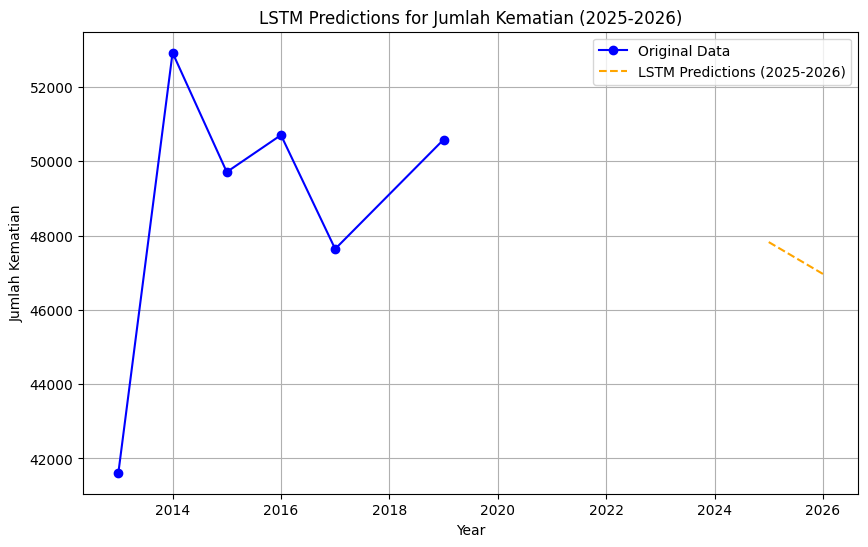

      Predicted Jumlah Kematian
Year                           
2025               47823.992188
2026               46966.285156


In [11]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('dataset.csv')

# Aggregate the data to get total deaths by year
aggregated_data = data.groupby('tahun')['jumlah'].sum().reset_index()

# Set the 'tahun' column as the index
aggregated_data.set_index('tahun', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(aggregated_data)

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Sequence length
SEQ_LENGTH = 3  # Use the last 3 years to predict the next year

# Create sequences
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split data into train and test sets
X_train, y_train = X[:-2], y[:-2]
X_test, y_test = X[-2:], y[-2:]

# Reshape input for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1)

# Predict for 2025 and 2026
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Prepare results
years = np.arange(2025, 2027)
predicted_df = pd.DataFrame({'Year': years, 'Predicted Jumlah Kematian': predictions.flatten()})
predicted_df.set_index('Year', inplace=True)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(aggregated_data, label='Original Data', marker='o', color='blue')
plt.plot(predicted_df, label='LSTM Predictions (2025-2026)', linestyle='--', color='orange')
plt.title('LSTM Predictions for Jumlah Kematian (2025-2026)')
plt.xlabel('Year')
plt.ylabel('Jumlah Kematian')
plt.legend()
plt.grid()
plt.show()

# Display the predicted values
print(predicted_df)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.4668
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5657 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4028 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4996 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3462 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4469 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3816 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2716 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3322 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2327 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2080 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1882 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2623 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2069 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2262 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━

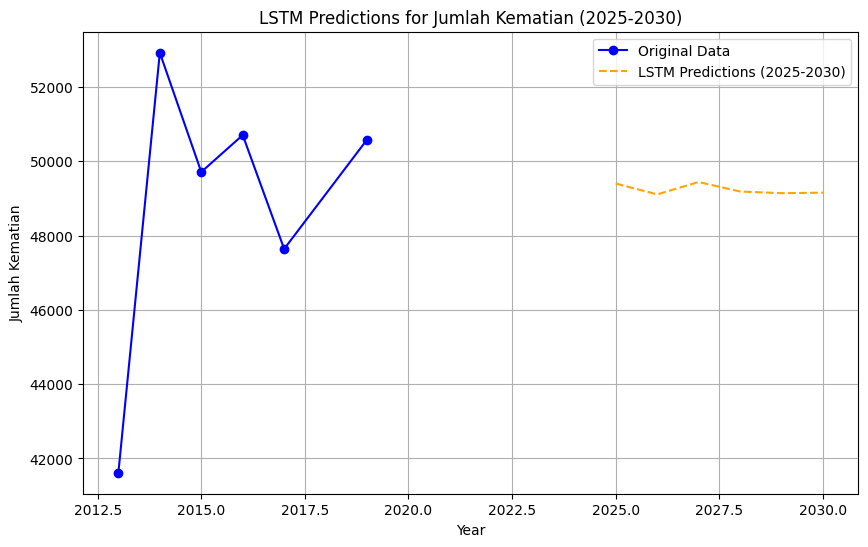

      Prediksi Jumlah Kematian
Year                          
2025                     49399
2026                     49107
2027                     49441
2028                     49185
2029                     49140
2030                     49153


In [12]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('dataset.csv')

# Aggregate the data to get total deaths by year
aggregated_data = data.groupby('tahun')['jumlah'].sum().reset_index()

# Set the 'tahun' column as the index
aggregated_data.set_index('tahun', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(aggregated_data)

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Sequence length
SEQ_LENGTH = 3  # Use the last 3 years to predict the next year

# Create sequences
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split data into training set (use entire data for training to predict future values)
X_train, y_train = X, y

# Reshape input for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1)

# Predict future values for 2025 to 2030
future_predictions = []
current_input = scaled_data[-SEQ_LENGTH:]  # Start with the last SEQ_LENGTH values

for year in range(2025, 2031):
    current_input = current_input.reshape((1, SEQ_LENGTH, 1))  # Reshape for LSTM input
    prediction = model.predict(current_input)
    future_predictions.append(prediction[0, 0])  # Save the prediction
    # Update the input sequence for the next prediction
    # Reshape prediction to (1, 1, 1) to match current_input dimensions
    prediction = prediction.reshape(1, 1, 1)
    current_input = np.concatenate([current_input[:, 1:, :], prediction], axis=1)

# Inverse scale the predictions and round to integers
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
future_predictions = future_predictions.round().astype(int)  # Round and convert to integers

# Prepare results
years = np.arange(2025, 2031)
predicted_df = pd.DataFrame({'Year': years, 'Prediksi Jumlah Kematian': future_predictions.flatten()})
predicted_df.set_index('Year', inplace=True)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(aggregated_data, label='Original Data', marker='o', color='blue')
plt.plot(predicted_df, label='LSTM Predictions (2025-2030)', linestyle='--', color='orange')
plt.title('LSTM Predictions for Jumlah Kematian (2025-2030)')
plt.xlabel('Year')
plt.ylabel('Jumlah Kematian')
plt.legend()
plt.grid()
plt.show()

# Display the predicted values
print(predicted_df)


Evaluasi

In [13]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Baca data dari file CSV
data = pd.read_csv('dataset.csv')

# Aggregate data to get total deaths by year
aggregated_data = data.groupby('tahun')['jumlah'].sum().reset_index()
aggregated_data.set_index('tahun', inplace=True)

train_data = aggregated_data[:-3]  # Use data up to 3 years before the end
test_data = aggregated_data[-3:]  # Use the last 3 years for testing

# Ambil jumlah kematian sebagai data training dan testing
train = train_data['jumlah'].values  # Data training
test = test_data['jumlah'].values    # Data testing

# Model SARIMA
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Prediksi untuk data testing
# Use the length of the test data for the forecast steps
predicted_sarima = model_fit.forecast(steps=len(test))

# Evaluasi
mae_sarima = round(np.mean(np.abs(test - predicted_sarima)), 3)
mse_sarima = round(np.mean((test - predicted_sarima)**2), 3)
rmse_sarima = round(np.sqrt(mse_sarima), 3)
mape_sarima = round(np.mean(np.abs((test - predicted_sarima) / test)) * 100, 3)

# Cetak hasil evaluasi
print("\nEvaluasi SARIMA:")
print(f"MAE: {mae_sarima}")
print(f"MSE: {mse_sarima}")
print(f"RMSE: {rmse_sarima}")
print(f"MAPE: {mape_sarima}%")
print("\n")


Evaluasi SARIMA:
MAE: 1312.333
MSE: 2012487.0
RMSE: 1418.622
MAPE: 2.677%




/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Baca data dari file CSV
data = pd.read_csv('dataset.csv')

# Aggregate data to get total deaths by year
aggregated_data = data.groupby('tahun')['jumlah'].sum().reset_index()
aggregated_data.set_index('tahun', inplace=True)

# Normalisasi data (LSTM membutuhkan data yang di-scale ke 0-1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(aggregated_data)

# Buat dataset untuk LSTM (input dan output sequences)
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps, 0])
        y.append(data[i+n_steps, 0])
    return np.array(X), np.array(y)

n_steps = 3  # Menggunakan 3 tahun terakhir sebagai input untuk memprediksi tahun berikutnya
X, y = create_sequences(scaled_data, n_steps)

# Split data menjadi training dan testing
train_size = int(len(X) * 0.8)  # 80% untuk training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Ubah bentuk data untuk LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Bangun model LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Latih model
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# Prediksi pada data testing
predicted_lstm = model.predict(X_test)

# Balikkan normalisasi hasil prediksi dan data aktual
predicted_lstm = scaler.inverse_transform(predicted_lstm)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluasi
mae_lstm = round(np.mean(np.abs(y_test_actual - predicted_lstm)), 3)
mse_lstm = round(np.mean((y_test_actual - predicted_lstm)**2), 3)
rmse_lstm = round(np.sqrt(mse_lstm), 3)
mape_lstm = round(np.mean(np.abs((y_test_actual - predicted_lstm) / y_test_actual)) * 100, 3)

# Cetak hasil evaluasi
print("\nEvaluasi LSTM:")
print(f"MAE: {mae_lstm}")
print(f"MSE: {mse_lstm}")
print(f"RMSE: {rmse_lstm}")
print(f"MAPE: {mape_lstm}%")
print("\n")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4707
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.4633
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.4557
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.4481
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.4407
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.4332
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.4259
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.4186
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.4114
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.4042
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3971
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3901
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3831
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3762
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3693
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/st

Skenario 10 kalo

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting paramete

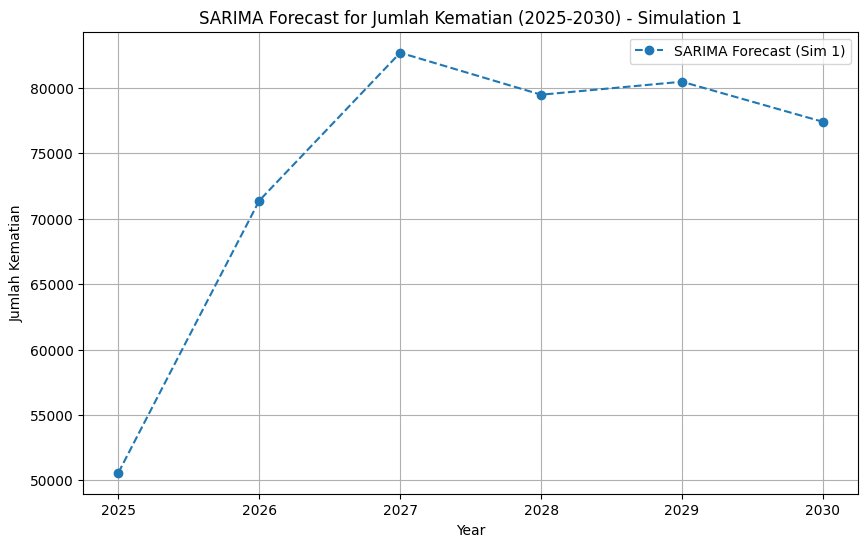

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting paramete

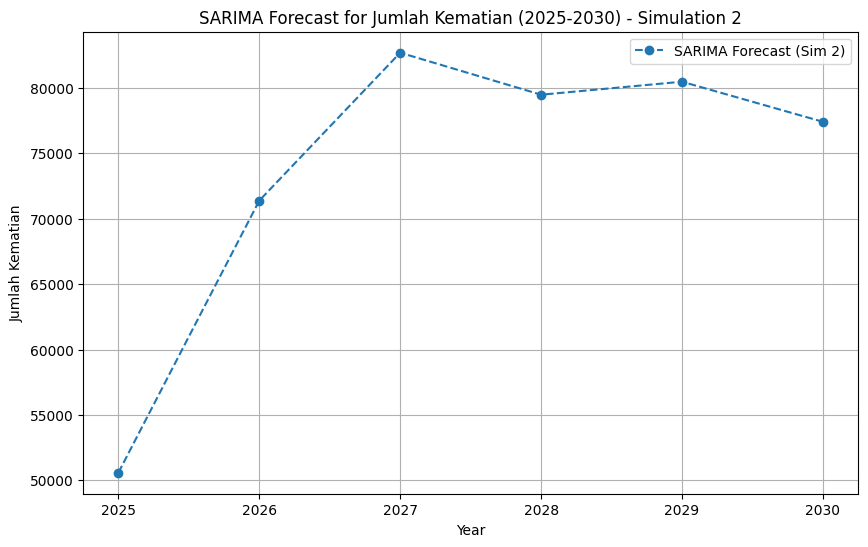

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting paramete

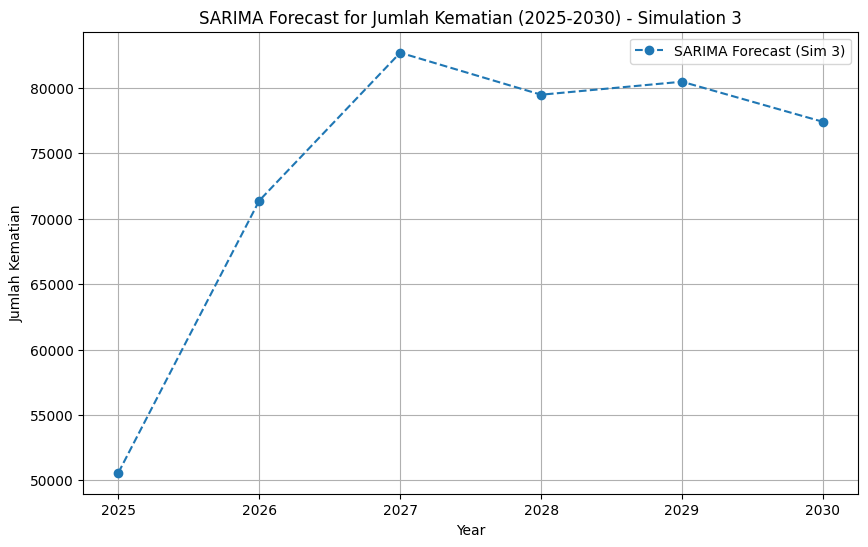

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting paramete

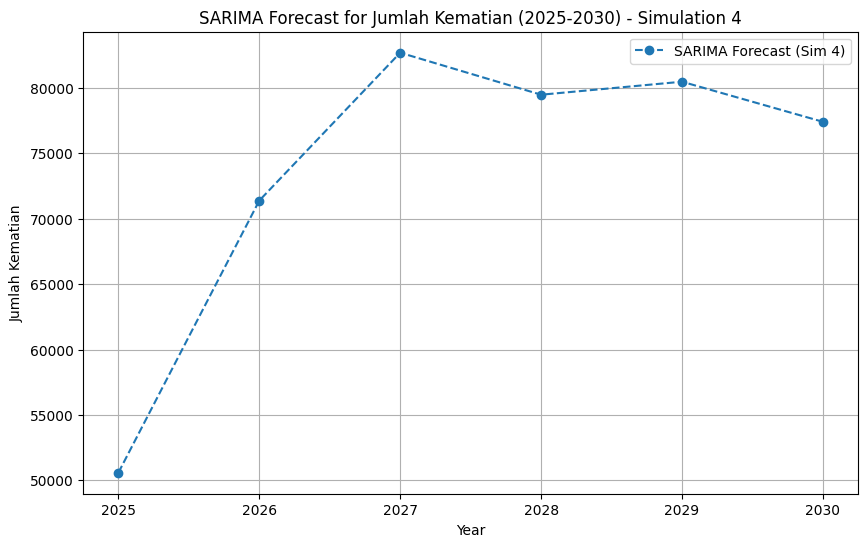

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting paramete

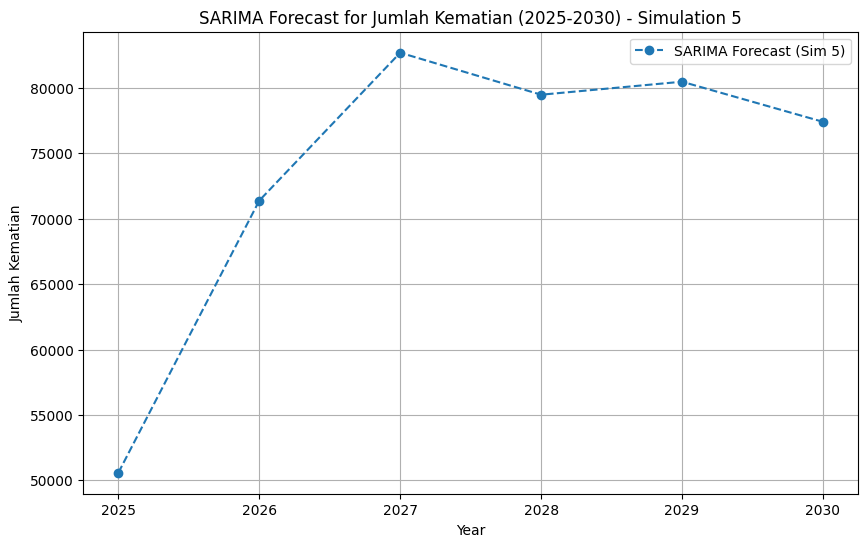

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting paramete

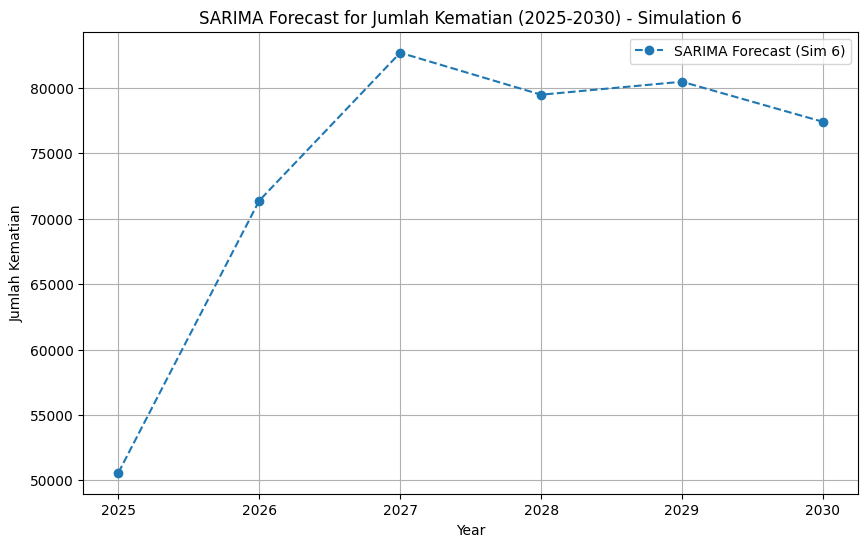

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting paramete

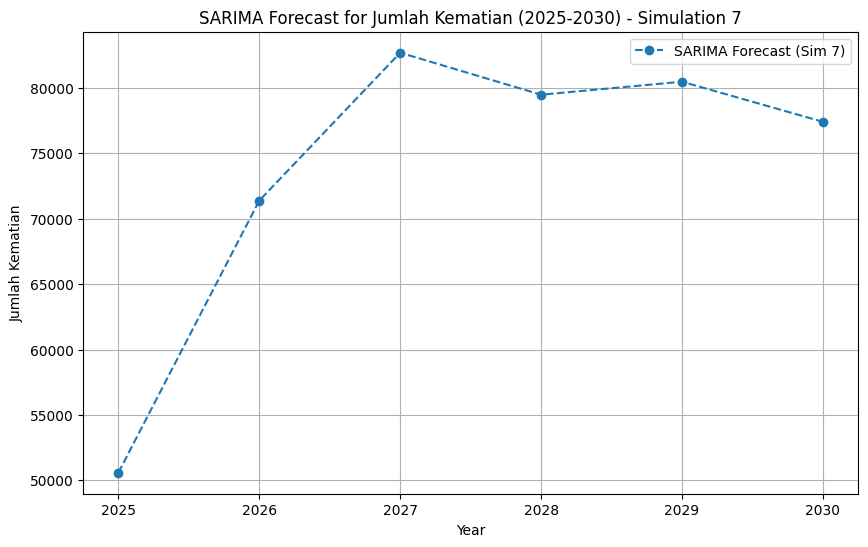

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting paramete

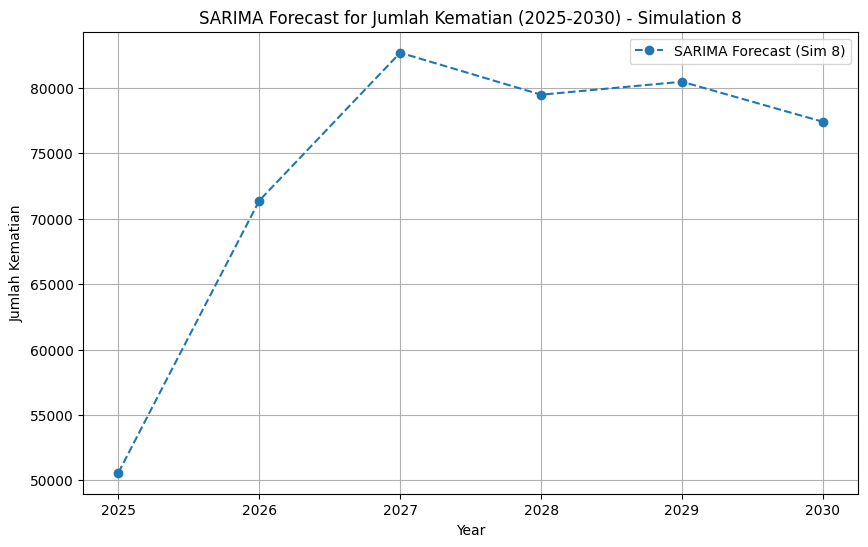

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting paramete

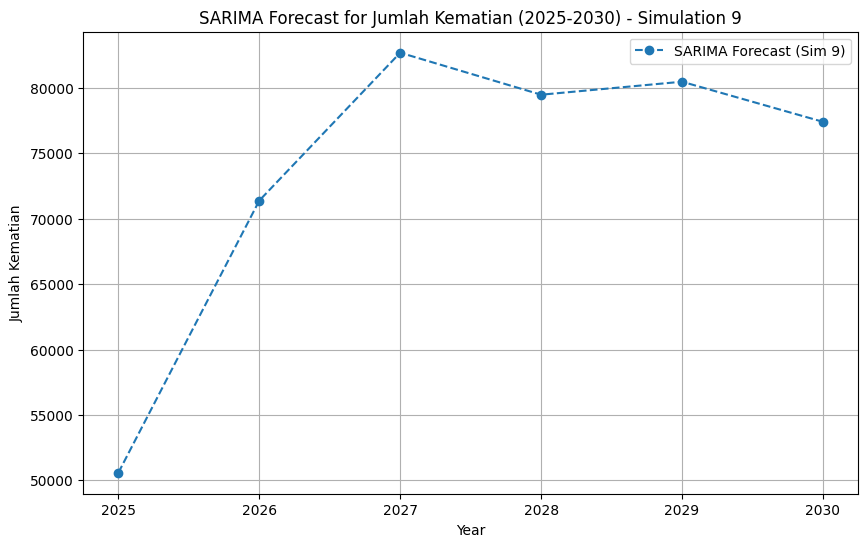

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting paramete

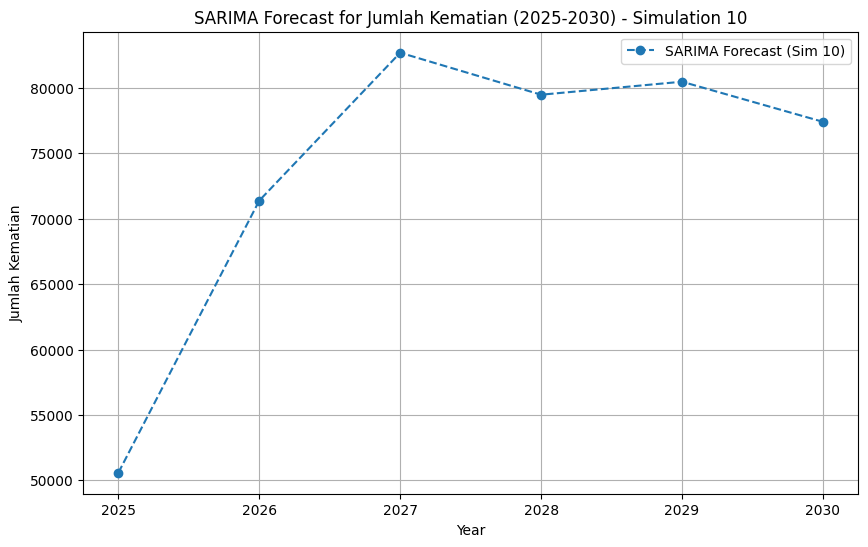

Predicted Values from 2025 to 2030 - Simulation 1:
2025    50582
2026    71390
2027    82696
2028    79485
2029    80479
2030    77414
Name: predicted_mean, dtype: int64
----------------------------------------
Predicted Values from 2025 to 2030 - Simulation 2:
2025    50582
2026    71390
2027    82696
2028    79485
2029    80479
2030    77414
Name: predicted_mean, dtype: int64
----------------------------------------
Predicted Values from 2025 to 2030 - Simulation 3:
2025    50582
2026    71390
2027    82696
2028    79485
2029    80479
2030    77414
Name: predicted_mean, dtype: int64
----------------------------------------
Predicted Values from 2025 to 2030 - Simulation 4:
2025    50582
2026    71390
2027    82696
2028    79485
2029    80479
2030    77414
Name: predicted_mean, dtype: int64
----------------------------------------
Predicted Values from 2025 to 2030 - Simulation 5:
2025    50582
2026    71390
2027    82696
2028    79485
2029    80479
2030    77414
Name: predicted_mean,

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('dataset.csv')

# Aggregate the data to get total deaths by year
aggregated_data = data.groupby('tahun')['jumlah'].sum().reset_index()

# Set the 'tahun' column as the index
aggregated_data.set_index('tahun', inplace=True)

# Placeholder for storing multiple forecasts
all_forecasts = []

# Simulate SARIMA model forecasting 10 times
for simulation in range(10):
    # Train the SARIMA model
    sarima_model = SARIMAX(aggregated_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    sarima_results = sarima_model.fit(disp=False)

    # Extend forecast to include predictions up to 2030
    future_years_extended = np.arange(aggregated_data.index[-1] + 1, 2031)  # Predict until 2030
    sarima_forecast_extended = sarima_results.forecast(steps=len(future_years_extended))

    # Assign the correct index (future years) to the forecast
    sarima_forecast_extended.index = future_years_extended

    # Filter results for 2025 to 2030 only
    sarima_forecast_filtered = sarima_forecast_extended.loc[2025:2030].round().astype(int)

    # Append to the list of forecasts
    all_forecasts.append(sarima_forecast_filtered)

    # Plot the forecast for this iteration
    plt.figure(figsize=(10, 6))
    plt.plot(sarima_forecast_filtered, label=f'SARIMA Forecast (Sim {simulation + 1})', linestyle='--', marker='o')
    plt.title(f'SARIMA Forecast for Jumlah Kematian (2025-2030) - Simulation {simulation + 1}')
    plt.xlabel('Year')
    plt.ylabel('Jumlah Kematian')
    plt.legend()
    plt.grid()
    plt.show()

# Display all 10 simulation results
for i, forecast in enumerate(all_forecasts, start=1):
    print(f"Predicted Values from 2025 to 2030 - Simulation {i}:")
    print(forecast)
    print("-" * 40)


Running Scenario 1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Running Scenario 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Running Scenario 3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Running Scenario 4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Running Scenario 5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Running Scenario 6


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Running Scenario 7


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Running Scenario 8


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Running Scenario 9


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Running Scenario 10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Year  Scenario 1  Scenario 2  Scenario 3  Scenario 4  Scenario 5  \
0  2025       49371       49412       49329       49324       49368   
1  2026       49068       49117       49043       49000       49074   
2  2027       49390       49485       49350       49354       49418   
3  2028       49125       49225       49092       49057       49156   
4  2029       49075       49187       49049       49000       49115   
5  2030       49079       49210       49055       49008       49130   

   Scenario 6  Scenario 7  Scenario 8  Scenario 9  Scenario 10  
0       49306       49394       49421       49323        49407  
1       48996       49109       49155       48981        49132  
2       49323       49444       49496       49353        49460  
3       49034       49185       49258       49057        49225  
4       48981       49145       49227       49003        49189  
5       48983       49156       49246       49021        49205  


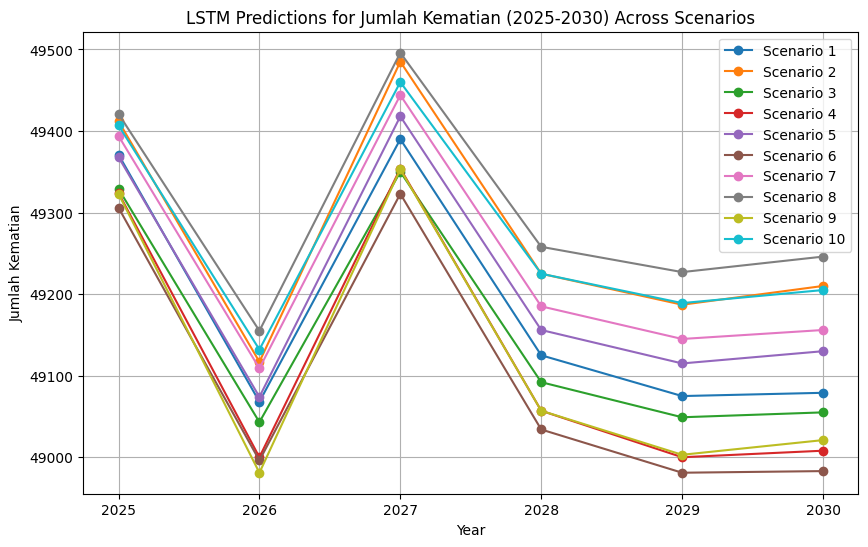

In [16]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('dataset.csv')

# Aggregate the data to get total deaths by year
aggregated_data = data.groupby('tahun')['jumlah'].sum().reset_index()

# Set the 'tahun' column as the index
aggregated_data.set_index('tahun', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(aggregated_data)

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Sequence length
SEQ_LENGTH = 3  # Use the last 3 years to predict the next year

# Create sequences
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split data into training set (use entire data for training to predict future values)
X_train, y_train = X, y

# Reshape input for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Placeholder to store predictions from all scenarios
predictions_table = pd.DataFrame(columns=["Year"] + [f"Scenario {i+1}" for i in range(10)])

# Initialize years for predictions
years = np.arange(2025, 2031)

# Add years to the table
predictions_table["Year"] = years

# Run 10 scenarios
for scenario in range(10):
    print(f"Running Scenario {scenario + 1}")

    # Build the LSTM model
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(SEQ_LENGTH, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=0)

    # Predict future values for 2025 to 2030
    future_predictions = []
    current_input = scaled_data[-SEQ_LENGTH:]  # Start with the last SEQ_LENGTH values

    for year in years:
        current_input = current_input.reshape((1, SEQ_LENGTH, 1))  # Reshape for LSTM input
        prediction = model.predict(current_input, verbose=0)
        future_predictions.append(prediction[0, 0])  # Save the prediction
        # Update the input sequence for the next prediction
        prediction = prediction.reshape(1, 1, 1)
        current_input = np.concatenate([current_input[:, 1:, :], prediction], axis=1)

    # Inverse scale the predictions and round to integers
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
    future_predictions = future_predictions.round().astype(int).flatten()  # Round and flatten

    # Add predictions to the table
    predictions_table[f"Scenario {scenario + 1}"] = future_predictions

# Display the table
print(predictions_table)

# Save to CSV if needed
predictions_table.to_csv('LSTM_Predictions_Table.csv', index=False)

# Optional: Visualize all scenarios in one plot
plt.figure(figsize=(10, 6))
for scenario in range(10):
    plt.plot(years, predictions_table[f"Scenario {scenario + 1}"], marker='o', label=f'Scenario {scenario + 1}')
plt.title('LSTM Predictions for Jumlah Kematian (2025-2030) Across Scenarios')
plt.xlabel('Year')
plt.ylabel('Jumlah Kematian')
plt.legend()
plt.grid()
plt.show()
